<a href="https://colab.research.google.com/github/a1xsa/machine_learning/blob/main/bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения
import os
from sklearn.metrics import accuracy_score
%matplotlib inline

# **Анализ датасета**

# 1. Загружаем данные


Загружаем файл из репозитория Git, изначально данные разделены на тестовую и обучающую выборку, для первоначального анализа и подготовки данных совместим их в одно целое.

In [ ]:
url_train = "https://raw.githubusercontent.com/a1xsa/machine_learning/refs/heads/main/Train.csv"
data_raw_train = pd.read_csv(url_train)
url_test="https://raw.githubusercontent.com/a1xsa/machine_learning/refs/heads/main/Test.csv"
data_raw_test=pd.read_csv(url_test)


In [ ]:
data_raw_train.shape

(45211, 17)

In [ ]:
data_raw_test.shape

(4521, 17)

In [ ]:
data_raw_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
data_all = pd.concat([data_raw_train, data_raw_test], ignore_index=True)
data_all.shape

(49732, 17)

In [ ]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.5+ MB


Мы видим что столбцы(признаки) имеют следующие имена:
- `age` - возраст(числовой)
- `job` - работа, категориальный признак ("admin", "unknown","unemployed" "management", "housemaid", "entrepreneur", "student", "blue-collar" "self-employed","retired","technician","services")
- `marital` - семейное положение ("married","divorced","single")
- `education` - образование ("unknown","secondary","primary","tertiary")
- `default` - наличие кредита (бинарный "yes","no")
- `balance` - среднегодовой баланс в евро (числовой)
- `housing` - наличие ипотеки (бинарный "yes","no")
- `loan` - личный кредит (бинарный "yes","no")
- `contact` - тип связи с клиентом ("unknown","telephone","cellular")
- `day` - число последнего контакта с клиентом (числовой)
- `month` - меся последнего контакта с клиентом ("jan", "feb", "mar", …, "nov", "dec")
- `duration` - продолжительность последнего контакта в секундах(числовое)
- `campaign` - количество контактов, выполненных в ходе этой кампании (числовое)
- `pdays` - количество дней, прошедших с момента последнего контакта с клиентом из предыдущей кампании (числовое, -1 - с клианетом ранее не связывались)
- `previous` - количество контактов выполненных до этой кампании
- `poutcome` - результат предыдущей маркетинговой компании ("unknown","other","failure","success")
- `y` - целевой признак, согласие на депозит ("yes", "no")

Требуется предсказать категориальный признак `y` по остальным признакам. Это задача классификации.

In [ ]:
data_all.describe()

,age,balance,day,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,15.816315,258.690179,2.766549,40.158630,0.576892
std,10.615008,3041.608766,8.315680,257.743149,3.099075,100.127123,2.254838
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Приведем все бинарные и категориальные признаки к типу category.

In [ ]:
data_all['job'].dtype

dtype('O')

In [ ]:
data_all['job'] = data_all['job'].astype('category')
data_all['marital'] = data_all['marital'].astype('category')
data_all['education'] = data_all['education'].astype('category')
data_all['default'] = data_all['default'].astype('category')
data_all['housing'] = data_all['housing'].astype('category')
data_all['loan'] = data_all['loan'].astype('category')
data_all['contact'] = data_all['contact'].astype('category')
data_all['month'] = data_all['month'].astype('category')
data_all['poutcome'] = data_all['poutcome'].astype('category')
data_all['y'] = data_all['y'].astype('category')

In [ ]:
data_all['job'].dtype

CategoricalDtype(categories=['admin.', 'blue-collar', 'entrepreneur', 'housemaid',
                  'management', 'retired', 'self-employed', 'services',
                  'student', 'technician', 'unemployed', 'unknown'],
, ordered=False, categories_dtype=object)

Выведем информацию о числовых и категориальных признаках.

In [ ]:
data_all.describe()

,age,balance,day,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,15.816315,258.690179,2.766549,40.158630,0.576892
std,10.615008,3041.608766,8.315680,257.743149,3.099075,100.127123,2.254838
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
data_all.describe(include=['category'])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,49732,49732,49732,49732,49732,49732,49732,49732,49732,49732
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,10678,30011,25508,48841,27689,41797,32181,15164,40664,43922


# 2. Пропущенные значения:

В качестве пропущенных значений будем также принимать поля "unknown".

In [ ]:
data_all.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
value_counts = data_all.apply(lambda col: col.eq("unknown").sum())
print(value_counts)

age              0
job            326
marital          0
education     2044
default          0
balance          0
housing          0
loan             0
contact      14344
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     40664
y                0
dtype: int64


С пропущенными значениями надо что-то сделать. В качестве обработки неизвестных значений в столбце `poutcome` можно удалить его из рассмотрения в целом. Так же предлагается сделать и со столбцом `contact`. Для признаков `job` и `education` заполним пропущенные значения модой.

In [ ]:
data_all['job'].value_counts()

,count
job,
blue-collar,10678
management,10427
technician,8365
admin.,5649
services,4571
retired,2494
self-employed,1762
entrepreneur,1655
unemployed,1431


In [ ]:
data_all['job'] = data_all['job'].replace("unknown", data_all['job'].mode().iloc[0])



<ipython-input-17-263ab540e5fd>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data_all['job'] = data_all['job'].replace("unknown", data_all['job'].mode().iloc[0])


In [ ]:
data_all['job'].value_counts()

,count
job,
blue-collar,11004
management,10427
technician,8365
admin.,5649
services,4571
retired,2494
self-employed,1762
entrepreneur,1655
unemployed,1431


In [ ]:
data_all['education'].value_counts()

,count
education,
secondary,25508
tertiary,14651
primary,7529
unknown,2044


In [ ]:
data_all['education'] = data_all['education'].replace("unknown", data_all['education'].mode().iloc[0])

<ipython-input-20-91d08fc70c81>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data_all['education'] = data_all['education'].replace("unknown", data_all['education'].mode().iloc[0])


In [ ]:
data_all['education'].value_counts()

,count
education,
secondary,27552
tertiary,14651
primary,7529


Признаки `contact` и `poutcome` содержат много пропущенных значений, удалим эти столбцы из рассмотрения.

In [ ]:
data_all=data_all.drop(columns=['contact','poutcome'])
value_counts = data_all.apply(lambda col: col.eq("unknown").sum())
print(value_counts)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64


In [ ]:

data_all.describe(include=['category'])

,job,marital,education,default,housing,loan,month,y
count,49732,49732,49732,49732,49732,49732,49732,49732
unique,11,3,3,2,2,2,12,2
top,blue-collar,married,secondary,no,yes,no,may,no
freq,11004,30011,27552,48841,27689,41797,15164,43922


In [ ]:
data_all.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no
3,47,blue-collar,married,secondary,no,1506,yes,no,5,may,92,1,-1,0,no
4,33,blue-collar,single,secondary,no,1,no,no,5,may,198,1,-1,0,no


# 3. Работа с выбросами.

In [ ]:
data_all.describe()

,age,balance,day,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,15.816315,258.690179,2.766549,40.158630,0.576892
std,10.615008,3041.608766,8.315680,257.743149,3.099075,100.127123,2.254838
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


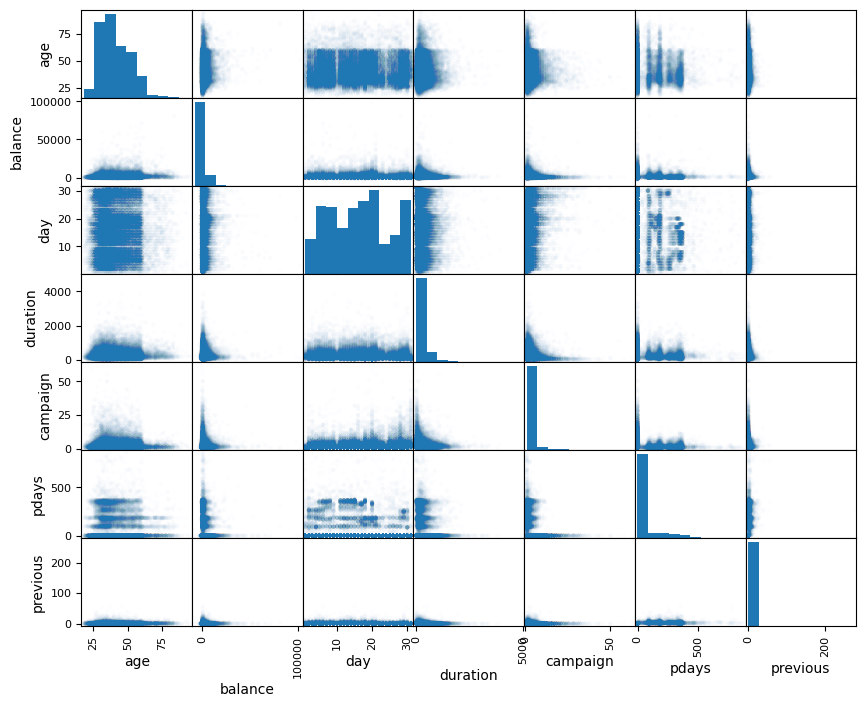

In [ ]:
pd.plotting.scatter_matrix(data_all, figsize = (10, 8),alpha=.01)
pass

Выявить выбросы на общей диаграмме затруднительно, используем квантили для решения этой проблемы. Удаляем строки не попавшие в  $99\%$ всех значений.

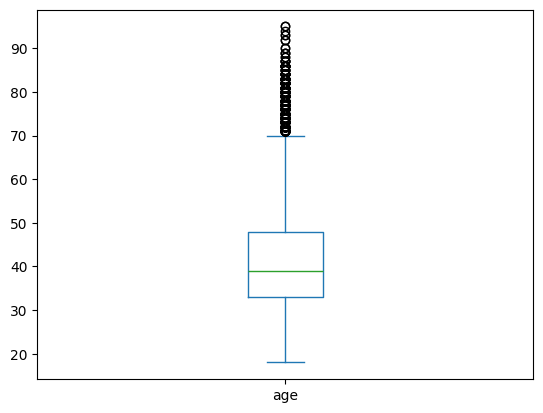

In [ ]:
data_all['age'].plot(kind='box')
pass

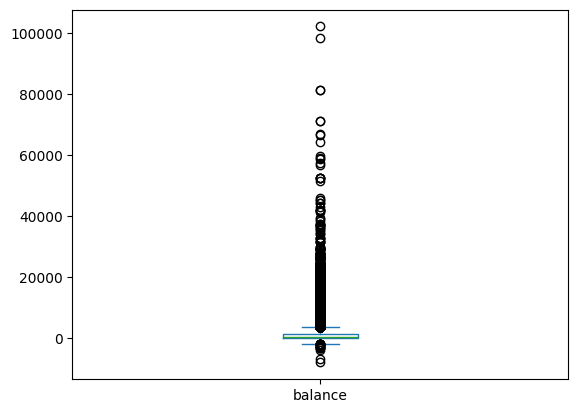

In [ ]:
data_all['balance'].plot(kind='box')
pass

In [ ]:
data_all['balance'].quantile([0.005,.01,.05,.1,.5,.9,.95,.985,.99,.995,.999])

,balance
0.005,-871.000
0.010,-630.000
0.050,-172.000
0.100,0.000
0.500,448.000
0.900,3611.900
0.950,5798.450
0.985,11115.000
0.990,13295.450
0.995,18137.565


Мы видим что  99%  всех значений признака 'balance' находятся в диапазоне от -800.0 до 32028.0. Удаляем все строки которые находятся за пределами квантилей.

In [ ]:

rows_to_drop = data_all[
    (data_all['balance'] < data_all['balance'].quantile(0.01)) | (data_all['balance'] > data_all['balance'].quantile(0.999))].index
data_all = data_all.drop(rows_to_drop)


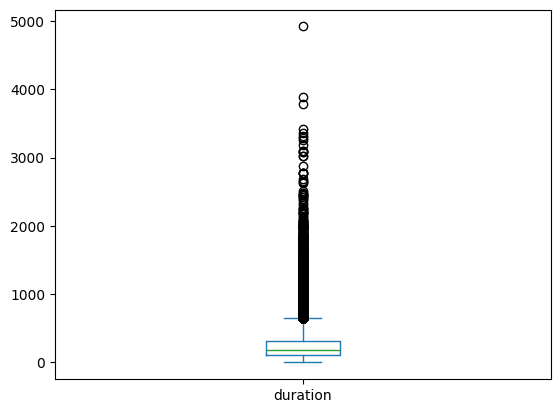

In [ ]:
data_all['duration'].plot(kind='box')
pass

In [ ]:
rows_to_drop = data_all[
    (data_all['duration'] < data_all['duration'].quantile(0.01)) | (data_all['duration'] > data_all['duration'].quantile(0.99))].index
data_all = data_all.drop(rows_to_drop)

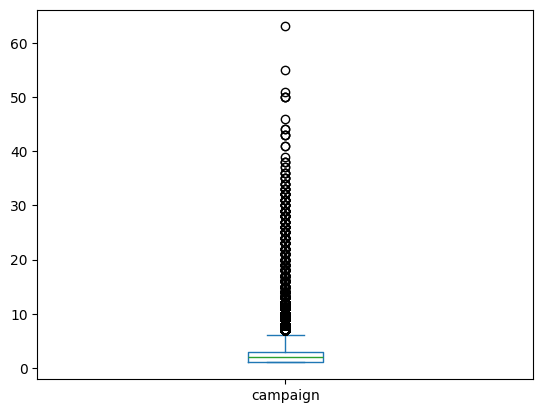

In [ ]:
data_all['campaign'].plot(kind='box')
pass

In [ ]:
rows_to_drop = data_all[
    (data_all['campaign'] < data_all['campaign'].quantile(0.01)) | (data_all['campaign'] > data_all['campaign'].quantile(0.99))].index
data_all = data_all.drop(rows_to_drop)

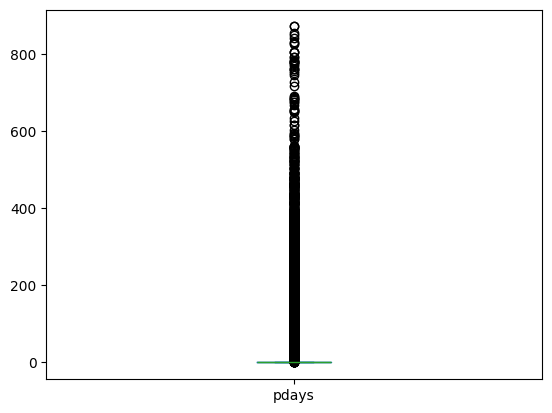

In [ ]:
data_all['pdays'].plot(kind='box')
pass

In [ ]:
rows_to_drop = data_all[
    (data_all['pdays'] < data_all['pdays'].quantile(0.01)) | (data_all['pdays'] > data_all['pdays'].quantile(0.99))].index
data_all = data_all.drop(rows_to_drop)

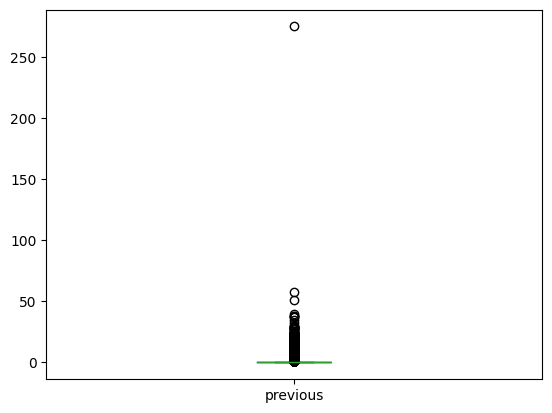

In [ ]:
data_all['previous'].plot(kind='box')
pass

In [ ]:
rows_to_drop = data_all[
    (data_all['previous'] < data_all['previous'].quantile(0.01)) | (data_all['previous'] > data_all['previous'].quantile(0.99))].index
data_all = data_all.drop(rows_to_drop)

In [ ]:
data_all.describe()

,age,balance,day,duration,campaign,pdays,previous
count,46950.000000,46950.000000,46950.000000,46950.000000,46950.000000,46950.000000,46950.000000
mean,40.971076,1337.939169,15.751118,248.157359,2.541960,35.313845,0.433142
std,10.622232,2582.823336,8.299287,213.250147,2.213021,90.075498,1.191674
min,18.000000,-630.000000,1.000000,11.000000,1.000000,-1.000000,0.000000
25%,33.000000,79.000000,8.000000,105.000000,1.000000,-1.000000,0.000000
50%,39.000000,456.000000,16.000000,181.000000,2.000000,-1.000000,0.000000
75%,48.000000,1438.000000,21.000000,317.000000,3.000000,-1.000000,0.000000
max,95.000000,31868.000000,31.000000,1272.000000,16.000000,370.000000,8.000000


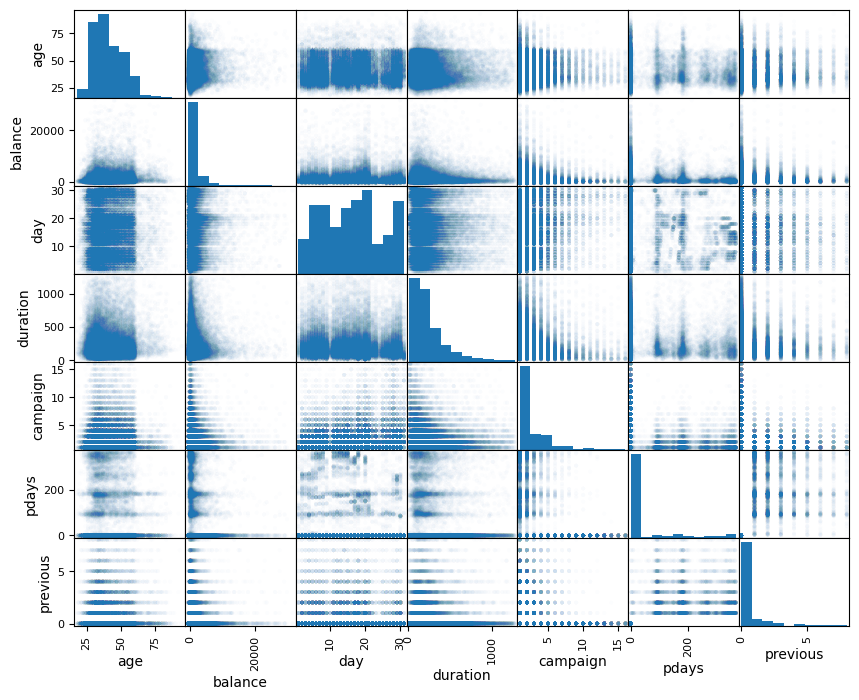

In [ ]:
pd.plotting.scatter_matrix(data_all, figsize = (10, 8),alpha=.01)
pass

Теперь диаграмы рассеивания выглядят более "презентабельно". Уже можно рассмотреть некоторые зависимости, к примеру, зависимость возраста от баланса клмента.

# 4. Работа с категориальными признаками:

In [ ]:
data_all.describe(include=['category'])

,job,marital,education,default,housing,loan,month,y
count,46950,46950,46950,46950,46950,46950,46950,46950
unique,11,3,3,2,2,2,12,2
top,blue-collar,married,secondary,no,yes,no,may,no
freq,10436,28401,26043,46198,25979,39550,14399,41772


К категориальным признакам применим метод бинаризации.

In [ ]:
numerical_columns=  [c for c in data_all.columns if data_all[c].dtype.name != 'category']
categorical_columns = [c for c in data_all.columns if data_all[c].dtype.name == 'category']
print(categorical_columns)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'y']


In [ ]:
data_describe = data_all.describe(include = ['category'])
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)


['default', 'housing', 'loan', 'y'] ['job', 'marital', 'education', 'month']


In [ ]:
data_all['y'].value_counts()

,count
y,
no,41772
yes,5178


In [ ]:
data_all['housing'].value_counts()

,count
housing,
yes,25979
no,20971


Для всех бинарных признаков выше просто заменим значения `yes` и `no` на 1 и 0.

In [ ]:
for column in binary_columns:
  data_all[column] = data_all[column].cat.codes

In [ ]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46950 entries, 0 to 49731
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        46950 non-null  int64   
 1   job        46950 non-null  category
 2   marital    46950 non-null  category
 3   education  46950 non-null  category
 4   default    46950 non-null  int8    
 5   balance    46950 non-null  int64   
 6   housing    46950 non-null  int8    
 7   loan       46950 non-null  int8    
 8   day        46950 non-null  int64   
 9   month      46950 non-null  category
 10  duration   46950 non-null  int64   
 11  campaign   46950 non-null  int64   
 12  pdays      46950 non-null  int64   
 13  previous   46950 non-null  int64   
 14  y          46950 non-null  int8    
dtypes: category(4), int64(7), int8(4)
memory usage: 3.2 MB


К категориальным небинарным признакам применим векторизацию с помощью `get_dummies`.

In [ ]:
nonbinary_columns

['job', 'marital', 'education', 'month']

In [ ]:
data_all['job'].unique()

['management', 'technician', 'entrepreneur', 'blue-collar', 'retired', ..., 'services', 'self-employed', 'unemployed', 'housemaid', 'student']
Length: 11
Categories (11, object): ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'services',
                          'student', 'technician', 'unemployed']

In [ ]:
job_dummies=pd.get_dummies(data_all['job'], dtype=int)

In [ ]:
job_dummies.head(5)

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
marital_dummies=pd.get_dummies(data_all['marital'], dtype=int)
marital_dummies.head(5)

,divorced,married,single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1


In [ ]:
education_dummies=pd.get_dummies(data_all['education'], dtype=int)
education_dummies.head(5)

,primary,secondary,tertiary
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [ ]:
month_dummies=pd.get_dummies(data_all['month'], dtype=int)
month_dummies.head(5)

,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0


Добавим dummy столбцы к таблице и удалем исходные:

In [ ]:
data_all=pd.concat((data_all,job_dummies),axis=1)
data_all=data_all.drop(['job'], axis=1)

In [ ]:
data_all=pd.concat((data_all,marital_dummies),axis=1)
data_all=data_all.drop(['marital'], axis=1)

In [ ]:
data_all=pd.concat((data_all,education_dummies),axis=1)
data_all=data_all.drop(['education'], axis=1)

In [ ]:
data_all=pd.concat((data_all,month_dummies),axis=1)
data_all=data_all.drop(['month'], axis=1)

In [ ]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46950 entries, 0 to 49731
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            46950 non-null  int64
 1   default        46950 non-null  int8 
 2   balance        46950 non-null  int64
 3   housing        46950 non-null  int8 
 4   loan           46950 non-null  int8 
 5   day            46950 non-null  int64
 6   duration       46950 non-null  int64
 7   campaign       46950 non-null  int64
 8   pdays          46950 non-null  int64
 9   previous       46950 non-null  int64
 10  y              46950 non-null  int8 
 11  admin.         46950 non-null  int64
 12  blue-collar    46950 non-null  int64
 13  entrepreneur   46950 non-null  int64
 14  housemaid      46950 non-null  int64
 15  management     46950 non-null  int64
 16  retired        46950 non-null  int64
 17  self-employed  46950 non-null  int64
 18  services       46950 non-null  int64
 19  student  

# 5. Нормализация:

Проведем стандартизацию признаков, чтобы в дальнейшем воспользоваться методом k-ближайших соседей. Стандартизация - линейное преобразование, приводящее все значнеия к нулевому среднему и единичному стандартному отклонению.

In [ ]:
numerical_columns

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [ ]:
data_numerical=data_all[numerical_columns]

In [ ]:
data_numerical=(data_numerical-data_numerical.mean(axis=0))/data_numerical.std(axis=0)

In [ ]:
data_numerical.describe()


,age,balance,day,duration,campaign,pdays,previous
count,4.695000e+04,4.695000e+04,4.695000e+04,4.695000e+04,4.695000e+04,4.695000e+04,4.695000e+04
mean,1.961370e-16,-4.721818e-17,2.179300e-17,2.421445e-18,7.264335e-18,1.404438e-16,-3.874312e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.162547e+00,-7.619333e-01,-1.777396e+00,-1.112109e+00,-6.967669e-01,-4.031490e-01,-3.634733e-01
25%,-7.504144e-01,-4.874275e-01,-9.339499e-01,-6.713119e-01,-6.967669e-01,-4.031490e-01,-3.634733e-01
50%,-1.855613e-01,-3.414632e-01,2.998833e-02,-3.149229e-01,-2.448958e-01,-4.031490e-01,-3.634733e-01
75%,6.617182e-01,3.874087e-02,6.324497e-01,3.228258e-01,2.069752e-01,-4.031490e-01,-3.634733e-01
max,5.086400e+00,1.182042e+01,1.837373e+00,4.801135e+00,6.081299e+00,3.715618e+00,6.349774e+00


# 6. Отбор признаков и разбиение данных:




In [ ]:
data_all=data_all.drop(numerical_columns,axis=1)

In [ ]:
data=pd.concat((data_numerical,data_all),axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46950 entries, 0 to 49731
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            46950 non-null  float64
 1   balance        46950 non-null  float64
 2   day            46950 non-null  float64
 3   duration       46950 non-null  float64
 4   campaign       46950 non-null  float64
 5   pdays          46950 non-null  float64
 6   previous       46950 non-null  float64
 7   default        46950 non-null  int8   
 8   housing        46950 non-null  int8   
 9   loan           46950 non-null  int8   
 10  y              46950 non-null  int8   
 11  admin.         46950 non-null  int64  
 12  blue-collar    46950 non-null  int64  
 13  entrepreneur   46950 non-null  int64  
 14  housemaid      46950 non-null  int64  
 15  management     46950 non-null  int64  
 16  retired        46950 non-null  int64  
 17  self-employed  46950 non-null  int64  
 18  services   

Для решения задачи классификации было принято убрать из рассмотрения признаки `day`, `month`, `pdays`.

In [ ]:
data=data.drop(['day','pdays','apr','aug','dec','feb','jan','jul','jun','mar','may','nov','oct','sep'],axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46950 entries, 0 to 49731
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            46950 non-null  float64
 1   balance        46950 non-null  float64
 2   duration       46950 non-null  float64
 3   campaign       46950 non-null  float64
 4   previous       46950 non-null  float64
 5   default        46950 non-null  int8   
 6   housing        46950 non-null  int8   
 7   loan           46950 non-null  int8   
 8   y              46950 non-null  int8   
 9   admin.         46950 non-null  int64  
 10  blue-collar    46950 non-null  int64  
 11  entrepreneur   46950 non-null  int64  
 12  housemaid      46950 non-null  int64  
 13  management     46950 non-null  int64  
 14  retired        46950 non-null  int64  
 15  self-employed  46950 non-null  int64  
 16  services       46950 non-null  int64  
 17  student        46950 non-null  int64  
 18  technician 

Разобьем данные на обучающую и тестовую выборку в пропорции 3:1.(75%- обучающая выборка, 25%- тестовая выборка).

In [ ]:
X=data.drop('y',axis=1)
y=data['y']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
N_train, _ = X_train.shape
N_test, _ = X_test.shape
N_train, N_test

(35212, 11738)

In [ ]:
y_train

,y
26537,0
22521,0
26979,0
26135,0
6504,0
...,...
11710,0
47377,0
40110,0
878,0


# 7. KNN:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7, p=1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7, p=1)

Проверим качество классификатора.

In [ ]:
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

In [ ]:
y_train!=y_train_pred

,y
26537,False
22521,False
26979,False
26135,False
6504,False
...,...
11710,False
47377,False
40110,False
878,False


Ошибки на обучающей и тестовой выборке.

In [ ]:
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.08826536408042712, 0.11237008008178566)

Построим матрицу рассогласования.

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
classes=[0,1]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


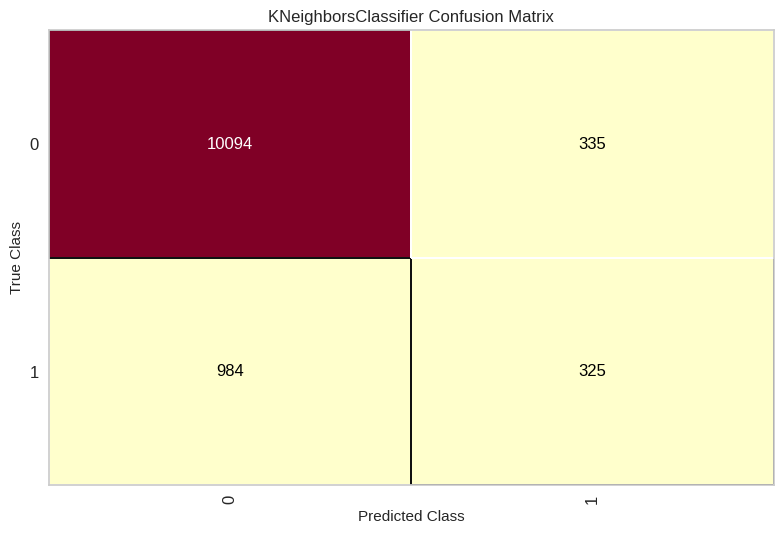

ConfusionMatrix(ax=<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=[0, 1],
                cmap=<matplotlib.colors.ListedColormap object at 0x79f4b003ff70>,
                estimator=KNeighborsClassifier(n_neighbors=7, p=1))

In [ ]:
from yellowbrick.classifier import confusion_matrix, class_prediction_error
confusion_matrix(model, X_test, y_test, classes=classes)

In [ ]:
y_test.value_counts()

,count
y,
0,10429
1,1309


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


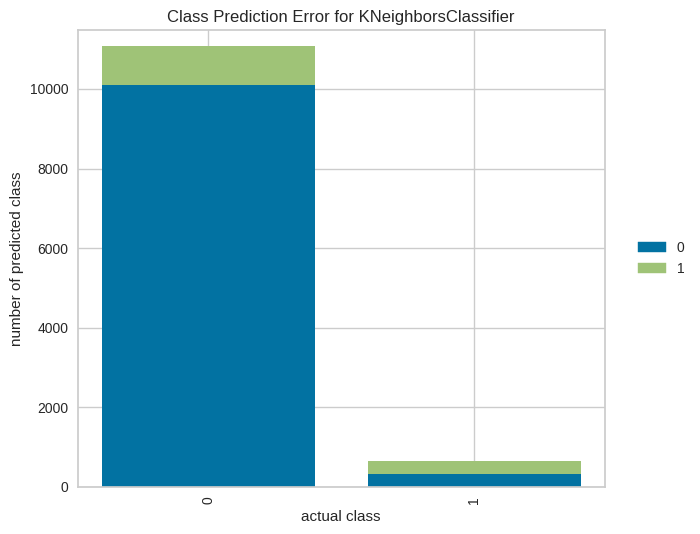

ClassPredictionError(ax=<Axes: title={'center': 'Class Prediction Error for KNeighborsClassifier'}, xlabel='actual class', ylabel='number of predicted class'>,
                     classes=[0, 1],
                     estimator=KNeighborsClassifier(n_neighbors=7, p=1))

In [ ]:
class_prediction_error(model, X_test, y_test, classes=classes)

Процент ошибки не велик, однако предсказания по первому классу показывают плохие результаты.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10429
           1       0.49      0.25      0.33      1309

    accuracy                           0.89     11738
   macro avg       0.70      0.61      0.63     11738
weighted avg       0.86      0.89      0.87     11738



Подберем параметры оптимального количества соседей.

In [ ]:
# from sklearn.model_selection import GridSearchCV
# nnb = [2, 3, 5, 10, 15, 19]
# knn = KNeighborsClassifier()
# grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
# grid.fit(X_train, y_train)

# best_cv_err = 1 - grid.best_score_
# best_n_neighbors = grid.best_estimator_.n_neighbors
# print(best_cv_err, best_n_neighbors)

In [ ]:
model_19 = KNeighborsClassifier(n_neighbors=19, p=1)
model_19.fit(X_train, y_train)
y_test_pred_19=model_19.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


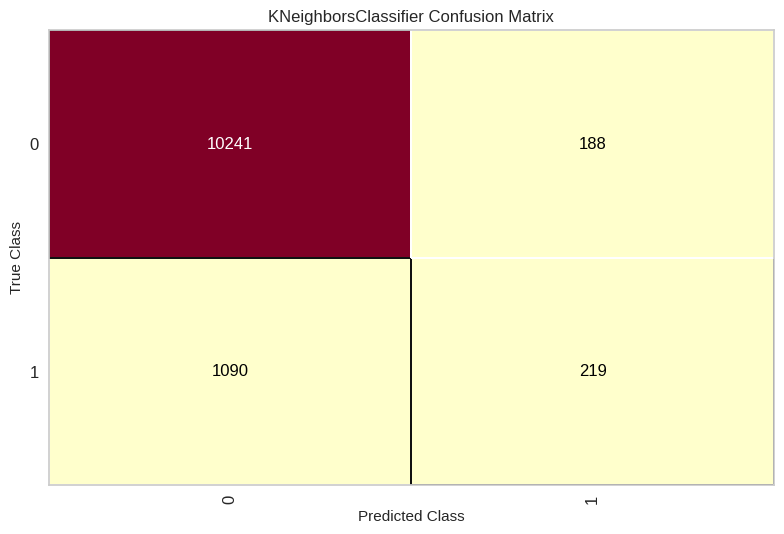

ConfusionMatrix(ax=<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=[0, 1],
                cmap=<matplotlib.colors.ListedColormap object at 0x79f4b01acc40>,
                estimator=KNeighborsClassifier(n_neighbors=19, p=1))

In [ ]:
confusion_matrix(model_19, X_test, y_test, classes=classes)

In [ ]:
print(classification_report(y_test, y_test_pred_19))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     10429
           1       0.54      0.17      0.26      1309

    accuracy                           0.89     11738
   macro avg       0.72      0.57      0.60     11738
weighted avg       0.86      0.89      0.86     11738



In [ ]:
accuracy_score(y_test, y_test_pred_19)

0.8911228488669279

Как можно заметить, процент ошибки стал меньше, однако определение объектов 1-го класса оставляет желать лучшего.

#8. MLP - Multi Layer Perceptron:

Создадим модель однослойной нейронной сети.

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
model = MLPClassifier(hidden_layer_sizes = (30,), random_state = 42)
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(30,), random_state=42)

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.09315006247870045, 0.10581018912932356)

In [ ]:
# model_2 = MLPClassifier(hidden_layer_sizes = (1000, 500), random_state = 42)
# model_2.fit(X_train, y_train)

In [ ]:
# y_train_pred = model_2.predict(X_train)
# y_test_pred = model_2.predict(X_test)
# np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

Подбор гиперпарамтеров.

Рассмотрим зависимость ошибки от числа нейронов в скрытом слое.

In [ ]:
array_neurons = np.arange(1, 40, 3)
test_err = []
train_err = []
train_acc = []
test_acc = []

for neurons in array_neurons:
    mlp_model = MLPClassifier(hidden_layer_sizes=(neurons), max_iter=1000)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)

    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

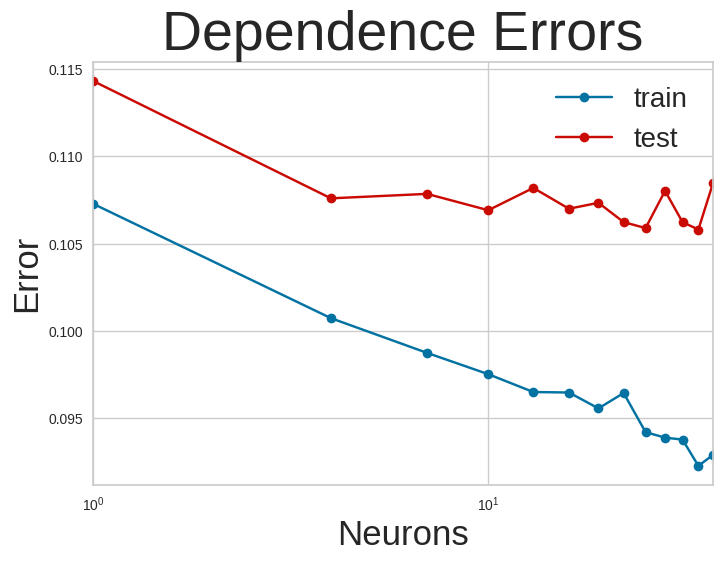

In [ ]:
plt.semilogx(array_neurons, train_err, 'b-o', label = 'train')
plt.semilogx(array_neurons, test_err, 'r-o', label = 'test')
plt.xlim([np.min(array_neurons), np.max(array_neurons)])
plt.title('Dependence Errors', fontsize = 40)
plt.xlabel('Neurons', fontsize = 25)
plt.ylabel('Error', fontsize = 25)
plt.legend(fontsize = 20)

In [ ]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.09226968079063956 0.10581018912932356


In [ ]:
neurons_opt = array_neurons[test_err == min_test_err]
print(neurons_opt)
neurons_opt=neurons_opt[0]

[34]


Ошибка на тестовых данных уменьшается с ростом количества нейронов.

Рассмотрим зависимость величины ошибки от параметра `alpha`.

In [ ]:
alpha_arr = np.logspace(-4, 5, 10)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(hidden_layer_sizes = (neurons_opt,), random_state = 42, alpha = alpha)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

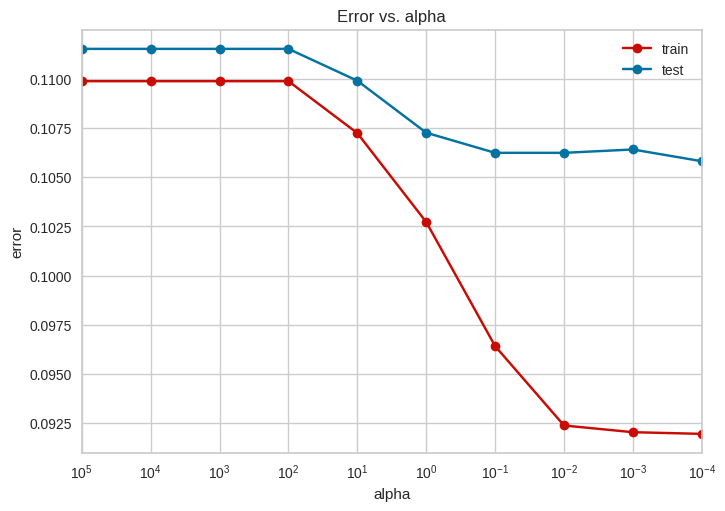

In [ ]:
plt.semilogx(alpha_arr, train_err, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'b-o', label = 'test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Минимальное значение ошибки:

In [ ]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0919572872884244 0.10581018912932356


Оптимальное значение `alpha`.

In [ ]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[0.0001]


In [ ]:
alpha_opt = alpha_opt[0]

Классификатор при найденных определенных значениях.

In [100]:

mlp_model = MLPClassifier(hidden_layer_sizes = (neurons_opt,), random_state = 42, alpha = alpha_opt)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(f"acc={100-100*np.mean(y_test != y_test_pred)}%")

acc=89.41898108706765%


# 9. Машина опопрных векторов.

In [101]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC()

In [102]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.09553561285925252, 0.10572499574033055)

Линейная классификация.

In [103]:
model = SVC(kernel = 'linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [104]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.10987731455185733, 0.11151814619185552)

Нелинейная классификаия.

In [105]:
model_nl = SVC(kernel = 'poly')
model_nl.fit(X_train, y_train)

SVC(kernel='poly')

In [106]:
y_train_pred = model_nl.predict(X_train)
y_test_pred = model_nl.predict(X_test)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.09860274906281949, 0.1078548304651559)

# 10. Logistic regression.

Установим параметры в 500 итераций и обучения на всех ядрах.

In [108]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500,n_jobs=-1)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500, n_jobs=-1)

In [109]:
accuracy_score(y_train, model.predict(X_train))

0.8961433602181075

In [111]:
accuracy_score(y_test, model.predict(X_test))

0.8894189810870676

In [112]:
err_train = np.mean(y_train != model.predict(X_train))
err_test  = np.mean(y_test  != model.predict(X_test))

print(err_train, err_test)

0.10385663978189254 0.11058101891293236


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


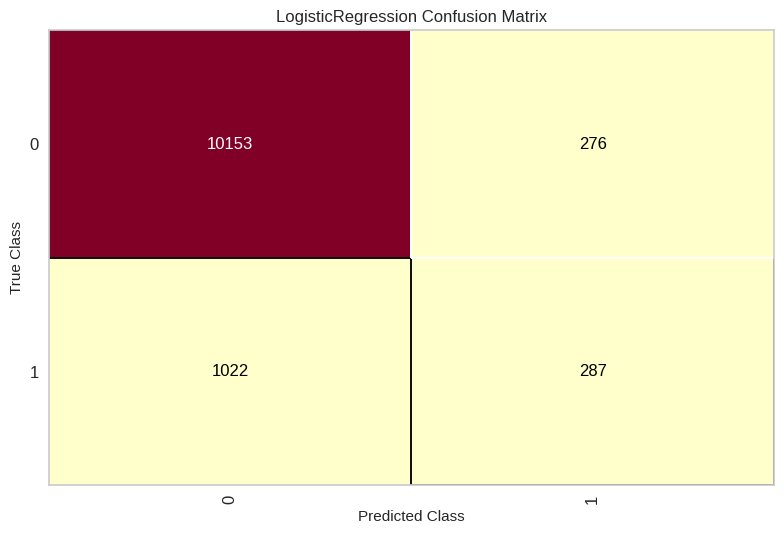

ConfusionMatrix(ax=<Axes: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=[0, 1],
                cmap=<matplotlib.colors.ListedColormap object at 0x79f4b0125900>,
                estimator=LogisticRegression(n_jobs=-1))

In [117]:
confusion_matrix(model1, X_test, y_test, classes=classes)